In [26]:
# suppress warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# import libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import optuna

In [27]:
# load data
df = pd.read_csv("../data/water-quality.csv")
df.shape

(7996, 21)

In [28]:
# first data set inspections
df.head(3)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0


In [29]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [30]:
df.isnull().sum()
#df.isna().mean().sort_values(ascending=False)

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [31]:
df.nunique()


aluminium       495
ammonia        2563
arsenic         107
barium          480
cadmium          23
chloramine      812
chromium         91
copper          201
flouride        151
bacteria        101
viruses          61
lead            200
nitrates       1803
nitrites        280
mercury          11
perchlorate    2999
radium          735
selenium         11
silver           51
uranium          10
is_safe           2
dtype: int64

In [32]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


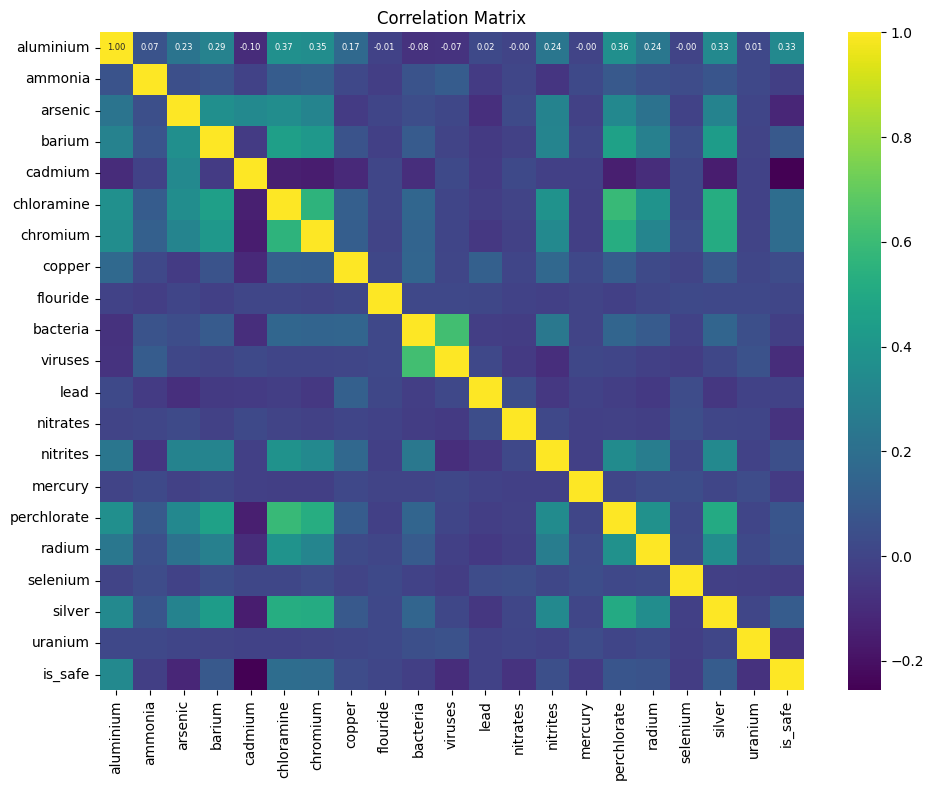

In [33]:
# correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    fmt='.2f',
    annot_kws={'size': 6}
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

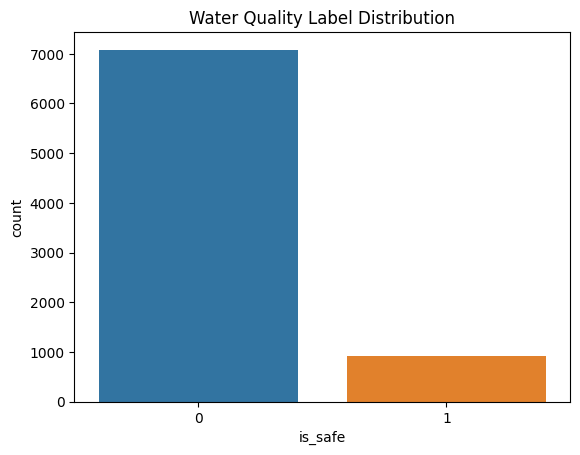

In [34]:
sns.countplot(data=df, x='is_safe')
plt.title('Water Quality Label Distribution')
plt.show() # --> class imbalance 

F1: 0.34527687296416937
AUC: 0.837


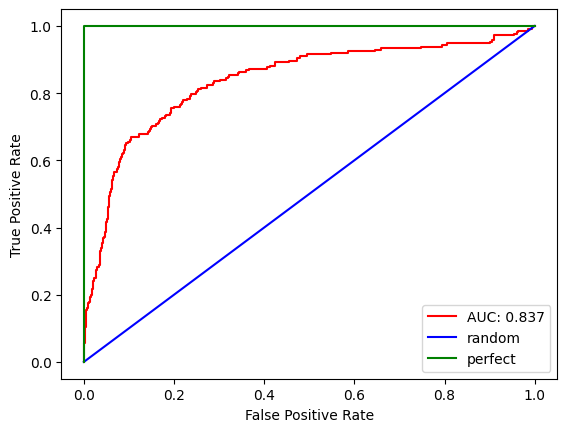

In [35]:
# modelling

# define features and target
X = df.drop("is_safe", axis = 1)
y = df.is_safe

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# instantiate model 
logreg = LogisticRegression()

# model training
logreg.fit(X_train, y_train)

# predictions on test-set
y_pred = logreg.predict(X_test)

# metrics

# The F1-score is particularly **useful for imbalanced datasets**, where both false-positives and false-negatives need to be minimized.
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

# ROC
from sklearn.metrics import roc_curve

# get predicted probabilities for positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba)

print('AUC: %.3f'% auc)

# visualize the metrics

import matplotlib.pyplot as plt

plt.plot(fpr, tpr,'r-',label = 'AUC: %.3f'%auc)
plt.plot([0,1],[0,1],'k-',label='random', color = 'blue')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

F1: 0.3873015873015873
AUC: 0.840


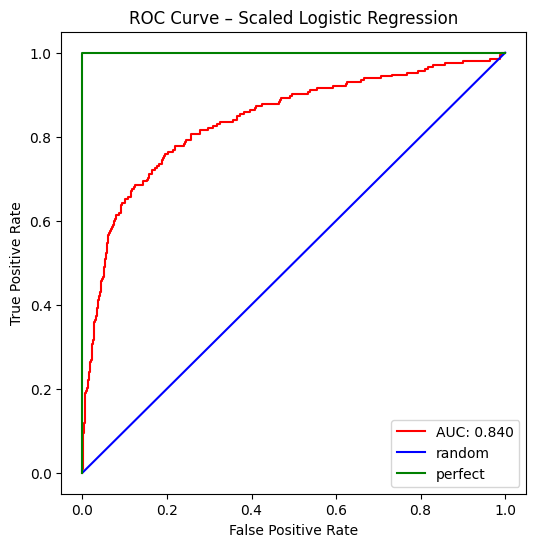

In [36]:
# scale data to improve prediction quality

from sklearn.preprocessing import StandardScaler 

# initialize the StandardScaler
scaler = StandardScaler()

# scaler training and scaling on the train data
X_train_scaled = scaler.fit_transform(X_train)

# scaling on the test data
X_test_transformed = scaler.transform(X_test)

# model training after scalling
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_transformed)
y_pred_proba = logreg.predict_proba(X_test_transformed)[:, 1]

# metrics after scaling

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

# ROC
y_pred_proba = logreg.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: %.3f'% auc)

# visualize the metrics after scalling

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr,'r-',label = 'AUC: %.3f'%auc)
plt.plot([0,1],[0,1],'k-',label='random', color = 'blue')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Scaled Logistic Regression')
plt.show()

in progress...

In [ ]:
# Optuna Tuning for Logistic Regression

import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline

scorer = make_scorer(average_precision_score, needs_proba=True)

# Optuna objective function




In [ ]:
# Train final model with best parameters